In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [187]:
# file_path = 'C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Jul Thu 18 2024 16-59-49-6432008.xlsx'
# file_path = 'C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Jul Thu 18 2024 14-55-54-8492289.xlsx' # 4hr

#file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx" # 20240807_epa_G571_fluorescence_6hr.skax
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-19-1019439.xlsx" # 20240807_epa_G571_absorbance_6hr.skax


cell_line_num = 2

# Read the Excel file into a pandas DataFrame
#df = pd.read_excel(file_path)
df = pd.read_excel(file_path, sheet_name='Integrated') # For absorbance

 # Subset the DataFrame to include only the plate readings
plate_only_df = df.iloc[10:16, 2:12]

if cell_line_num == 1:
    cell_line = plate_only_df.iloc[0:3, :]
elif cell_line_num == 2:
    cell_line = plate_only_df.iloc[3:6, :]


cell_line

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
13,0.3304,0.3419,0.324,0.461,0.4523,0.4434,0.5316,0.526,0.4524,0.3411
14,0.3138,0.3346,0.3284,0.4611,0.4864,0.521,0.5178,0.5448,0.6067,0.3919
15,0.3307,0.3148,0.3139,0.5107,0.4614,0.4752,0.4712,0.4866,0.4781,0.3547


In [188]:
skax_file_name = df.iloc[0,0]
skax_file_name

'20240807_epa_G571_absorbance_6hr.skax'

In [189]:
# concentrations = [600, 300, 150, 100, 75, 37.5, 18.75, 9.375, 0]
concentrations = [1000, 500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 0] # Epacadostat concentrations

# Find the median of each column in cell_line
cell_line_med = cell_line.median()

# Fetch the number of the last value in the cell_line_avg Series
background = cell_line_med.iloc[-1]

# Subtract the background from the cell_line_avg Series
cell_line_med = cell_line_med - background

cell_line_med = cell_line_med.iloc[:-1]

# Fetch the number of the last value in the cell_line_avg Series
no_drug_response = cell_line_med.iloc[-1]
print(no_drug_response)

# Remove the last value from the cell_line_avg Series
cell_line_med = cell_line_med.iloc[:-1]

# Divide by the no-drug response
cell_line_med = cell_line_med/no_drug_response*100

cell_line_med

# Remove the last column from cell_line dataframe
cell_line = cell_line.iloc[:, :-2]
cell_line

0.12340000000000001


,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
13,0.3304,0.3419,0.324,0.461,0.4523,0.4434,0.5316,0.526
14,0.3138,0.3346,0.3284,0.4611,0.4864,0.521,0.5178,0.5448
15,0.3307,0.3148,0.3139,0.5107,0.4614,0.4752,0.4712,0.4866


In [190]:
no_drug_response

0.12340000000000001

In [191]:
cell_line_med

Unnamed: 2    -19.692058
Unnamed: 3    -16.288493
Unnamed: 4    -24.878444
Unnamed: 5     86.223663
Unnamed: 6     86.466775
Unnamed: 7     97.649919
Unnamed: 8    132.171799
Unnamed: 9    138.816856
dtype: object

In [192]:
# Minus background from every column in cell_line
cell_line = cell_line.sub(background)

# Divide every column in cell_line by no_drug_response
cell_line = cell_line.div(no_drug_response)*100
cell_line

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
13,-19.692058,-10.372771,-24.878444,86.142626,79.092382,71.880065,143.354943,138.816856
14,-33.144246,-16.288493,-21.312804,86.223663,106.726094,134.764992,132.171799,154.051864
15,-19.448947,-32.333874,-33.063209,126.418152,86.466775,97.649919,94.408428,106.888169


In [193]:
rep1 = cell_line.iloc[0, :]
rep2 = cell_line.iloc[1, :]
rep3 = cell_line.iloc[2, :]

In [ ]:
# # Mean

# # Calculate the average of the replicates
# cell_line_avg = cell_line.mean(axis=0)

# # Fetch the number of the last value in the cell_line_avg Series
# background = cell_line_avg.iloc[-1]

# # Remove the last value from the cell_line_avg Series
# cell_line_avg = cell_line_avg.iloc[:-1]

# # Subtract the background from the cell_line_avg Series
# cell_line_avg = cell_line_avg - background

# # Fetch the number of the last value in the cell_line_avg Series
# no_drug_response = cell_line_avg.iloc[-1]
# # Remove the last value from the cell_line_avg Series
# cell_line_avg = cell_line_avg.iloc[:-1]

# # Divide by the no-drug response
# cell_line_avg = cell_line_avg/no_drug_response

[1000.      500.      250.      125.       62.5      31.25     15.625
    7.8125]
[-19.692058346839538 -16.288492706645062 -24.87844408427877
 86.22366288492705 86.46677471636949 97.64991896272284 132.17179902755268
 138.81685575364665]


In [194]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Example dose-response function (logistic function)
def dose_response(x, bottom, top, ic50, hill_slope):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill_slope)

doses = np.array(concentrations[:-1])
responses = np.array(cell_line_med[:])

print(doses)
print(responses)


[1000.      500.      250.      125.       62.5      31.25     15.625
    7.8125]
[-19.692058346839538 -16.288492706645062 -24.87844408427877
 86.22366288492705 86.46677471636949 97.64991896272284 132.17179902755268
 138.81685575364665]


In [195]:
# Fit the model to the data
popt, pcov = curve_fit(dose_response, doses, responses, bounds=([-50, -50, 0, 0], [200, 200, 200, 5]))

# Extract the fitted parameters
bottom, top, ic50, hill_slope = popt
print(f"IC50: {ic50}")

# Generate doses for plotting the fit
# Use a range that covers all data points
doses_fit = np.logspace(np.log10(min(doses)), np.log10(max(doses)), 100)
responses_fit = dose_response(doses_fit, *popt)

print(responses_fit)

IC50: 154.63157210558515
[115.19567765 115.19566498 115.19564878 115.1956281  115.19560166
 115.19556789 115.19552473 115.1954696  115.19539915 115.19530914
 115.19519414 115.1950472  115.19485946 115.19461959 115.19431311
 115.19392153 115.19342121 115.19278196 115.19196521 115.19092168
 115.18958839 115.18788489 115.18570843 115.18292768 115.17937491
 115.17483585 115.16903678 115.16162808 115.15216324 115.140072
 115.12462624 115.10489639 115.07969598 115.04751105 115.00641053
 114.95393237 114.88693953 114.80143791 114.69234722 114.55321365
 114.37585171 114.14990084 113.862282   113.49653998 113.03206152
 112.4431682  111.69810107 110.75794421 109.57558419 108.09487596
 106.25028914 103.96743782 101.16503603  97.75892351  93.66879021
  88.82796853  83.1960286   76.77285076  69.61151996  61.8262836
  53.59169735  45.13060903  36.69174363  28.52124179  20.83481633
  13.79694812   7.51088346   2.0195689   -2.68522531  -6.64955398
  -9.94333068 -12.64816506 -14.84811523 -16.62347673 -

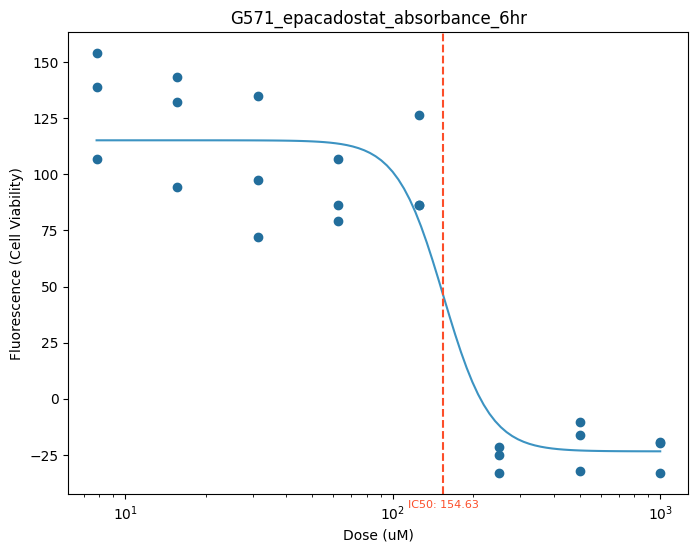

In [200]:
# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, rep1, label='Data', color='#226E9C')
plt.scatter(doses, rep2, label='Data', color='#226E9C')
plt.scatter(doses, rep3, label='Data', color='#226E9C')
plt.plot(doses_fit, responses_fit, label='Fit', color='#3C93C2')
# Plot vertical line and text
plt.axvline(x=ic50, color='#FC4E2A', linestyle='--', label=f'IC50: {ic50:.2f}')
plt.text(ic50, -45, f'IC50: {ic50:.2f}', color='#FC4E2A', ha='center', va='top', fontsize=8)

plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Fluorescence (Cell Viability)')
#plt.legend()
plt.title('G571_epacadostat_absorbance_6hr')
# Display the IC50 value on the plot

plt.savefig('C:/GSC Project/drug_dose_response/figures/' + 'G571_epacadostat_absorbance_6hr' + '.png')
plt.show()

IC50: 2.0389281871757703e-06


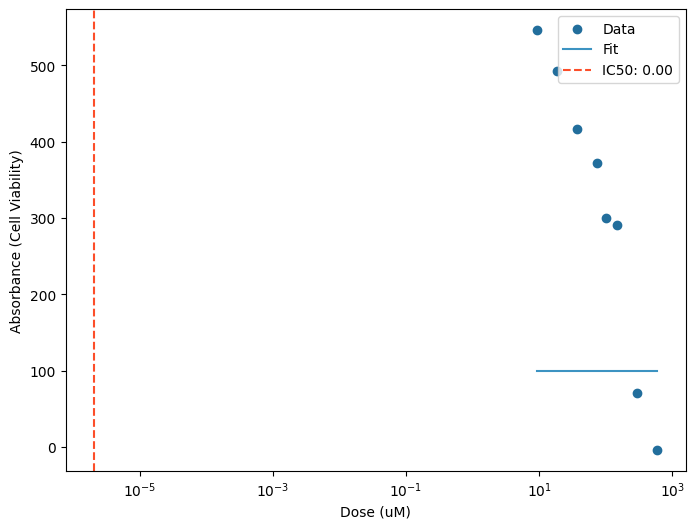

In [25]:
# Plot the dose-response curve
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example dose-response function (logistic function)
def dose_response(x, bottom, top, ic50, hill_slope):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill_slope)



# Remove the 0 dose and corresponding response
doses = np.array(concentrations[:-1])
responses = np.array(cell_line_avg[:-1])

# Fit the model to the data
popt, pcov = curve_fit(dose_response, doses, responses, bounds=([0, 0, 0, 0], [100, 100, 100, 2]))

# Extract the fitted parameters
bottom, top, ic50, hill_slope = popt
print(f"IC50: {ic50}")

# Generate doses for plotting the fit
# Use a range that covers all data points
doses_fit = np.logspace(np.log10(min(doses)), np.log10(max(doses)), 100)
responses_fit = dose_response(doses_fit, *popt)

# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, responses, label='Data', color='#226E9C')
plt.plot(doses_fit, responses_fit, label='Fit', color='#3C93C2')
plt.axvline(x=ic50, color='#FC4E2A', linestyle='--', label=f'IC50: {ic50:.2f}')
plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Absorbance (Cell Viability)')
plt.legend()
#plt.title(plot_title)
#plt.savefig('C:/GSC Project/drug_dose_response/figures/' + plot_filename + '.png')
plt.show()

In [28]:
doses_fit

array([1.69363059e+03, 1.94726362e+03, 2.23887997e+03, 2.57416791e+03,
       2.95966756e+03, 3.40289849e+03, 3.91250634e+03, 4.49843153e+03,
       5.17210312e+03, 5.94666175e+03, 6.83721594e+03, 7.86113686e+03,
       9.03839709e+03, 1.03919603e+04, 1.19482290e+04, 1.37375599e+04,
       1.57948556e+04, 1.81602457e+04, 2.08798696e+04, 2.40067761e+04,
       2.76019588e+04, 3.17355452e+04, 3.64881651e+04, 4.19525230e+04,
       4.82352068e+04, 5.54587665e+04, 6.37641047e+04, 7.33132254e+04,
       8.42923938e+04, 9.69157694e+04, 1.11429584e+05, 1.28116944e+05,
       1.47303352e+05, 1.69363059e+05, 1.94726362e+05, 2.23887997e+05,
       2.57416791e+05, 2.95966756e+05, 3.40289849e+05, 3.91250634e+05,
       4.49843153e+05, 5.17210312e+05, 5.94666175e+05, 6.83721594e+05,
       7.86113686e+05, 9.03839709e+05, 1.03919603e+06, 1.19482290e+06,
       1.37375599e+06, 1.57948556e+06, 1.81602457e+06, 2.08798696e+06,
       2.40067761e+06, 2.76019588e+06, 3.17355452e+06, 3.64881651e+06,
      

In [17]:
# Example dose-response function (logistic function)
def dose_response(x, bottom, top, ic50, hill_slope):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill_slope)



# Remove the 0 dose and corresponding response
doses = np.array(concentrations)
responses = np.array(cell_line_avg)

# Fit the model to the data
popt, pcov = curve_fit(dose_response, doses, responses, bounds=([0, 0, 0, 0], [100, 100, 100, 2]))

In [49]:
doses

array([600.  , 300.  , 150.  , 100.  ,  75.  ,  37.5 ,  18.75])

In [46]:
responses = np.array(cell_line_avg)
responses

array([-3.979999999999997, 70.91333333333336, 290.87, 299.50333333333333,
       371.9033333333333, 417.00333333333333, 492.4366666666667, 546.27,
       569.87], dtype=object)

In [16]:
# Get all file names in the directory
import os
file_names = os.listdir('C:/GSC Project/drug_dose_response/raw_data')

# Filter the file names to include only Wed 7
file_names = [f for f in file_names if 'Wed 7' in f]

file_names

['temporarySkanitExport Aug Wed 7 2024 17-32-38-4934330.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-33-12-6582261.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-33-38-5612691.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-34-19-5418553.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-34-34-9452369.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-34-54-2441755.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-35-20-3021668.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-36-05-3241490.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-36-20-7278336.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-36-39-9798442.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-37-19-1019439.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx']

In [17]:
# Open the first file in the list
file_path = 'C:/GSC Project/drug_dose_response/raw_data/' + file_names[0]
df = pd.read_excel(file_path)

df

,Measurement results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,20240807_D1MT_G523_G571_absorbance.skax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-07 3:15:19 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Absorbance 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wavelength: 570 nm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,D1MT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Abs,1.0,2,3,4,5,6,7,8,9,10,11,12.0
9,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cell_line_num = 1

 # Subset the DataFrame to include only the plate readings
plate_only_df = df.iloc[10:16, 2:12]

if cell_line_num == 1:
    cell_line = plate_only_df.iloc[0:3, :]
elif cell_line_num == 2:
    cell_line = plate_only_df.iloc[3:6, :]


cell_line

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
10,0.3498,0.4139,0.4285,0.4601,0.5181,0.4745,0.4376,0.4813,0.4374,0.3298
11,0.3752,0.443,0.4809,0.498,0.4891,0.4627,0.4357,0.4754,0.4103,0.264
12,0.2932,0.3519,0.3886,0.5575,0.4106,0.4138,0.3594,0.356,0.3814,0.3018


In [19]:
file_path = 'C:/GSC Project/drug_dose_response/raw_data/' + file_names[1]
df = pd.read_excel(file_path)

df

,Measurement results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,20240807_D1MT_G523_G571_absorbance_600.skax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-07 3:17:46 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Absorbance 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wavelength: 600 nm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Plate 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Abs,1.0,2,3,4,5,6,7,8,9,10,11,12.0
9,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Open this file drug_dose_response\cleaned_up_data\20240807_G571_epa_fluo.xlsx
file_path = 'C:/GSC Project/drug_dose_response/cleaned_up_data/20240807_G571_epa_fluo.xlsx'
df = pd.read_excel(file_path)

df

,Dose (uM),1000,500,250,125,62.5,31.25,15.625,7.8125,0,-1
0,6hr_12nm,24.53,17.390,54.12,1014.0,1317.0,1186.0,1351.0,1227.0,1266.0,20.45
1,6hr_12nm,13.97,6.899,35.82,600.4,753.2,848.8,892.4,958.5,928.7,18.73
2,6hr_12nm,12.33,12.260,45.58,670.8,822.9,891.5,917.5,973.0,923.3,17.63
3,4hr_5nm,27.87,18.630,48.08,938.3,1345.0,1237.0,1461.0,1359.0,1410.0,28.43
4,4hr_5nm,24.38,10.530,53.20,710.5,1033.0,1172.0,1182.0,1390.0,1235.0,30.36
5,4hr_5nm,19.92,22.280,55.78,875.7,1171.0,1244.0,1181.0,1214.0,1267.0,27.76
6,4hr_12nm,23.11,16.520,39.86,750.6,1082.0,1026.0,1224.0,1136.0,1175.0,25.50
7,4hr_12nm,21.22,10.100,41.70,592.5,853.6,983.0,995.5,1103.0,1008.0,23.61
8,4hr_12nm,19.28,18.450,48.69,735.4,969.5,1045.0,1010.0,1033.0,1054.0,24.65


In [23]:
# Transpose the dataframe
df.columns = df.iloc[0]
df = df[1:]
df

,0,1,2,3,4,5,6,7,8
Dose (uM),6hr_12nm,6hr_12nm,6hr_12nm,4hr_5nm,4hr_5nm,4hr_5nm,4hr_12nm,4hr_12nm,4hr_12nm
1000,24.53,13.97,12.33,27.87,24.38,19.92,23.11,21.22,19.28
500,17.39,6.899,12.26,18.63,10.53,22.28,16.52,10.1,18.45
250,54.12,35.82,45.58,48.08,53.2,55.78,39.86,41.7,48.69
125,1014.0,600.4,670.8,938.3,710.5,875.7,750.6,592.5,735.4
62.5,1317.0,753.2,822.9,1345.0,1033.0,1171.0,1082.0,853.6,969.5
31.25,1186.0,848.8,891.5,1237.0,1172.0,1244.0,1026.0,983.0,1045.0
15.625,1351.0,892.4,917.5,1461.0,1182.0,1181.0,1224.0,995.5,1010.0
7.8125,1227.0,958.5,973.0,1359.0,1390.0,1214.0,1136.0,1103.0,1033.0
0,1266.0,928.7,923.3,1410.0,1235.0,1267.0,1175.0,1008.0,1054.0


In [25]:
# Convert dataframe into long format, make the column names the values of a new column   
# Convert to long format
df_long = pd.melt(df, id_vars=['Dose (uM)'], var_name='Measurement', value_name='Value')

df_long

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Dose (uM)']"